# Jupiter Notebook for Scenario 02
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/), [XGBoost](https://pypi.org/project/xgboost/), and [dill](https://pypi.org/project/dill/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`<br>
`pip install xgboost`<br>
`pip install dill`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from time import perf_counter

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-02-Mixed-traffic.csv')

In [4]:
#No trunkated 
pd.set_option('display.max_columns', None)

In [5]:
#Dataset dimensions, number of sessions and features
df.shape

(268579, 52)

In [6]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 247319, 1: 21260})

In [7]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [8]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    268578
srcIP                  12512
srcPrt                 53389
dstIP                  11894
dstPrt                   238
flowduration          164998
total_fpackets           652
total_bpackets           846
total_fpktl             8936
total_bpktl            20556
min_fpktl                151
min_bpktl                496
max_fpktl               1323
max_bpktl               1127
mean_fpktl             19827
mean_bpktl             24418
std_fpktl              35248
std_bpktl              30803
total_fipt            102241
total_bipt             79712
min_fipt               54841
min_bipt               24556
max_fipt               96130
max_bipt               71690
mean_fipt              97713
mean_bipt              76541
std_fipt               84818
std_bipt               67466
fpsh_cnt                 193
bpsh_cnt                 439
furg_cnt                   1
burg_cnt                   1
total_fhlen             3172
total_bhlen   

In [10]:
# Delete time stamp (ts), srcIP and dstIP features
# Models do not learn with IP addresses
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

In [11]:
#Dataset dimensions, number of sessions and features
print(df.shape)

(268579, 49)


In [12]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(268579, 49)
(265823, 49)


In [13]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio,label
0,TCP,50427,80,11.999684,14,12,1989,10121,66,66,605,1434,142.071426,843.416687,193.387008,624.542227,11.999674,8.554984,0.000011,0.000007,5.001139,5.002421,0.923052,0.777726,1.754546,1.739128,2,4,0,0,448,384,1.166697,1.000026,2.166724,1.009193e+03,465.769231,564.095703,0.675740,1.588288,2,0,0,26,0,0,0,5.088487,0
1,TCP,38785,80,12.197338,26,17,3311,16298,66,66,604,1434,127.346153,958.705872,173.232083,601.908815,12.197329,9.455732,0.000012,0.000006,5.005066,5.005881,0.487893,0.590983,1.301350,1.514653,3,6,0,0,832,544,2.131613,1.393747,3.525359,1.607646e+03,456.023256,570.117188,0.407021,1.245630,2,0,0,43,0,0,0,4.922380,0
2,TCP,33983,80,0.382890,7,7,814,3990,66,66,410,1434,116.285713,570.000000,129.550139,654.889304,0.382890,0.382864,0.000013,0.000007,0.193679,0.189382,0.063815,0.063811,0.098699,0.097178,1,1,0,0,232,236,18.282013,18.282013,36.564026,1.254668e+04,343.142857,510.992828,0.029794,0.071657,2,2,0,13,0,0,0,4.901720,0
3,TCP,56754,25,0.000013,1,1,66,54,66,54,66,54,66.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,32,20,76260.070312,76260.070312,152520.140625,9.151209e+06,60.000000,8.485281,0.000013,0.000000,0,1,1,1,0,0,0,0.818182,0
4,TCP,56755,25,0.000018,1,1,66,54,66,54,66,54,66.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,32,20,55924.054688,55924.054688,111848.109375,6.710886e+06,60.000000,8.485281,0.000018,0.000000,0,1,1,1,0,0,0,0.818182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268574,UDP,58772,53,0.000551,1,1,81,384,81,384,81,384,81.000000,384.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,47,350,1814.930298,1814.930298,3629.860596,8.439426e+05,232.500000,214.253357,0.000551,0.000000,0,0,0,0,0,0,0,4.740741,0
268575,UDP,59865,53,0.264637,1,1,74,74,74,74,74,74,74.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,40,3.778761,3.778761,7.557522,5.592567e+02,74.000000,0.000000,0.264637,0.000000,0,0,0,0,0,0,0,1.000000,0
268576,UDP,64348,53,0.000295,1,1,74,138,74,138,74,138,74.000000,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,104,3390.706543,3390.706543,6781.413086,7.188298e+05,106.000000,45.254833,0.000295,0.000000,0,0,0,0,0,0,0,1.864865,0
268577,UDP,59871,53,0.000000,1,0,74,0,74,0,74,0,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,0,0.000000,0.000000,0.000000,0.000000e+00,74.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0


In [14]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 244571 of 265823 (92.0%)
> Class 1 : 21252 of 265823 (8.0%)


# Create training and test dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [16]:
#Original dataset dimensions
X_train.shape, X_test.shape

((212658, 48), (53165, 48))

# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [18]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
furg_cnt                int64
burg_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSe

In [19]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])
# fit on the trainning dataset
enc.fit_transform(X_train, y_train)
# Coding categorical variables of the trainning dataset
training_numeric_dataset=enc.transform(X_train)
# Coding categorical variables of the test dataset
testing_numeric_dataset = enc.transform(X_test)

In [20]:
#show trainning dataset
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
103880,0.000737,0.000000,0.000343,0.080064,1,1,108,192,108,192,108,192,108.0,192.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,74,158,12.489999,12.489999,24.979998,3.747000e+03,150.0,59.396969,0.080064,0.000000,0,0,0,0,0,0,0,1.777778
124959,0.000737,0.003791,0.000343,0.978804,2,2,164,282,82,141,82,141,82.0,141.0,0.0,0.000000,0.978642,0.978670,0.978642,0.97867,0.978642,0.978670,0.978642,0.978670,0.000000,0.000000,0,0,0,0,96,214,2.043310,2.043310,4.086619,4.556581e+02,111.5,34.063667,0.326313,0.564934,0,0,0,0,0,0,0,1.719512
267159,0.000737,0.000535,0.000343,0.035606,1,1,81,352,81,352,81,352,81.0,352.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,47,318,28.085228,28.085228,56.170456,1.216090e+04,216.5,191.625931,0.035606,0.000000,0,0,0,0,0,0,0,4.345679
42742,0.278085,0.000073,0.190102,12.820711,4,3,246,174,60,54,66,66,61.5,58.0,3.0,6.928203,12.820711,12.252606,0.568161,0.00006,11.593357,12.252546,4.273571,6.126303,6.339284,8.663815,0,0,0,0,92,72,0.311995,0.233996,0.545992,3.275950e+01,60.0,4.898980,2.136803,4.642579,2,2,0,6,0,0,0,0.707317
131019,0.000737,0.003791,0.000343,0.000265,1,1,80,183,80,183,80,183,80.0,183.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,46,149,3775.251221,3775.251221,7550.502441,9.928911e+05,131.5,72.832001,0.000265,0.000000,0,0,0,0,0,0,0,2.287500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120496,0.000737,0.000001,0.000343,0.035916,1,1,76,374,76,374,76,374,76.0,374.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,42,340,27.842859,27.842859,55.685719,1.252929e+04,225.0,210.717819,0.035916,0.000000,0,0,0,0,0,0,0,4.921052
261814,0.000737,0.000000,0.000343,0.185493,1,1,98,180,98,180,98,180,98.0,180.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,64,146,5.391039,5.391039,10.782079,1.498709e+03,139.0,57.982758,0.185493,0.000000,0,0,0,0,0,0,0,1.836735
132727,0.000737,0.009529,0.000343,6.136319,1,1,75,118,75,118,75,118,75.0,118.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,41,84,0.162964,0.162964,0.325928,3.145208e+01,96.5,30.405592,6.136319,0.000000,0,0,0,0,0,0,0,1.573333
147873,0.000737,0.001438,0.000343,0.000135,1,1,85,132,85,132,85,132,85.0,132.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,98,7410.431152,7410.431152,14820.862305,1.608064e+06,108.5,33.234020,0.000135,0.000000,0,0,0,0,0,0,0,1.552941


In [21]:
#show testing dataset
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
221821,0.000737,0.003791,0.000343,0.000301,1,1,85,169,85,169,85,169,85.000000,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,135,3320.905762,3320.905762,6641.811523,8.435101e+05,127.000000,59.396969,0.000301,0.000000,0,0,0,0,0,0,0,1.988235
238197,0.000737,0.079936,0.000343,0.000264,1,1,74,138,74,138,74,138,74.000000,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,104,3788.892578,3788.892578,7577.785156,8.032452e+05,106.000000,45.254833,0.000264,0.000000,0,0,0,0,0,0,0,1.864865
122241,0.000737,0.000000,0.000343,13.270593,7,7,690,918,94,122,126,186,98.571426,131.142853,12.094863,24.189726,13.197905,13.197357,0.000006,0.000013,13.197625,13.197275,2.199651,2.199559,5.387885,5.387758,0,0,0,0,452,680,0.527482,0.527482,1.054964,1.211702e+02,114.857143,24.964151,1.026448,3.657084,0,0,0,0,0,0,0,1.330435
72684,0.278085,0.555396,0.190102,6.241960,7,7,848,2614,60,54,482,1434,121.142860,373.428558,159.138758,508.410542,6.241954,6.241944,0.010304,0.000006,4.856465,5.009539,1.040326,1.040324,1.920186,1.998958,1,2,0,0,152,152,1.121443,1.121443,2.242885,5.546335e+02,247.285714,384.868286,0.852017,1.799235,2,2,0,13,0,0,0,3.082547
233255,0.000737,0.079936,0.000343,0.000164,1,1,85,144,85,144,85,144,85.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,110,6096.372070,6096.372070,12192.744141,1.396069e+06,114.500000,41.719299,0.000164,0.000000,0,0,0,0,0,0,0,1.694118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223456,0.000737,0.285205,0.000343,3.092232,2,2,144,826,72,413,72,413,72.000000,413.000000,0.000000,0.000000,3.091830,2.734951,3.091830,2.734951,3.091830,2.734951,3.091830,2.734951,0.000000,0.000000,0,0,0,0,76,758,0.646782,0.646782,1.293564,3.136893e+02,242.500000,196.876434,1.149838,1.691254,0,0,0,0,0,0,0,5.736111
31302,0.278085,0.009529,0.190102,5.018024,5,5,666,2076,60,54,420,1473,133.199997,415.200012,160.347118,612.781156,5.018024,5.016138,0.001323,0.000024,5.005569,5.007710,1.254506,1.254035,2.500710,2.502452,1,2,0,0,112,112,0.996408,0.996408,1.992816,5.464302e+02,274.200000,447.667755,1.113762,2.205917,1,2,0,9,0,0,0,3.117117
220007,0.000737,0.003791,0.000343,6.275454,1,1,74,156,74,156,74,156,74.000000,156.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,122,0.159351,0.159351,0.318702,3.665073e+01,115.000000,57.982758,6.275454,0.000000,0,0,0,0,0,0,0,2.108108
109144,0.000737,0.003791,0.000343,18.313331,4,4,308,648,77,162,77,162,77.000000,162.000000,0.000000,0.000000,8.003977,0.000020,2.001040,0.000006,4.001854,0.000007,2.667992,0.000007,1.155158,0.000001,0,0,0,0,172,512,0.218420,0.218420,0.436840,5.220241e+01,119.500000,45.434410,2.616190,3.705729,0,0,0,0,0,0,0,2.103896


# Standardization and scaling of numerical variables

In [22]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [23]:
# fit on the trainning dataset
preprocessor.fit_transform(training_numeric_dataset)
X_train_stand = preprocessor.transform(training_numeric_dataset)
X_test_stand  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

### Re-generate the dataset as a dataframe

In [24]:
labels=list(training_numeric_dataset.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [25]:
df_X_train_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.632212,-0.432014,-0.460777,-0.073723,-0.063516,-0.070303,-0.054136,-0.075280,1.058061,0.578819,-0.299887,-0.328669,0.280402,-0.199656,-0.406165,-0.430949,-0.067039,-0.079945,-0.172938,-0.112813,-0.329577,-0.225661,-0.264993,-0.189727,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.042605,-0.072390,-0.279330,-0.309525,-0.304969,-0.440361,-0.187314,-0.411301,-0.362660,-0.308956,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,-0.252712
1,-0.632212,-0.413394,-0.460777,-0.067402,-0.055379,-0.063070,-0.050717,-0.074581,0.038315,0.084302,-0.428153,-0.434894,-0.325415,-0.371827,-0.406165,-0.430949,-0.060138,-0.069069,-0.003534,0.071319,-0.255045,-0.162419,-0.122774,-0.048321,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.037499,-0.053910,-0.280758,-0.311200,-0.306572,-0.443808,-0.405921,-0.541598,-0.310940,-0.192312,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,-0.263583
2,-0.632212,-0.429387,-0.460777,-0.074036,-0.063516,-0.070303,-0.055785,-0.074038,-0.000906,2.130245,-0.433087,0.004587,-0.348716,0.340489,-0.406165,-0.430949,-0.067039,-0.079945,-0.172938,-0.112813,-0.329577,-0.225661,-0.264993,-0.189727,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.048872,-0.019588,-0.277198,-0.307025,-0.302575,-0.431548,0.190281,0.268792,-0.371998,-0.308956,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,0.226388
3,1.581748,-0.431657,0.639415,0.015887,-0.039106,-0.055838,-0.045711,-0.075419,-0.824547,-0.759286,-0.507086,-0.591108,-0.803078,-0.652027,-0.367463,-0.396857,0.023366,0.056226,-0.074588,-0.112801,0.553362,0.566104,0.356054,0.695452,1.059469,1.263632,-0.026771,-0.039978,0.0,0.0,-0.038427,-0.100772,-0.280995,-0.311490,-0.306844,-0.444251,-0.698344,-0.691601,0.069317,0.649619,2.090325,1.214944,-0.206408,-0.039987,0.0,-0.003067,0.0,-0.452432
4,-0.632212,-0.413394,-0.460777,-0.074284,-0.063516,-0.070303,-0.055846,-0.075349,-0.040127,0.491551,-0.438020,-0.347414,-0.372016,-0.230039,-0.406165,-0.430949,-0.067039,-0.079945,-0.172938,-0.112813,-0.329577,-0.225661,-0.264993,-0.189727,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.049105,-0.075361,0.235107,0.293706,0.272573,0.595645,-0.292359,-0.342201,-0.379420,-0.308956,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,-0.157612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212653,-0.632212,-0.432008,-0.460777,-0.074034,-0.063516,-0.070303,-0.056090,-0.073867,-0.197011,2.343566,-0.457753,0.050410,-0.465219,0.414758,-0.406165,-0.430949,-0.067039,-0.079945,-0.172938,-0.112813,-0.329577,-0.225661,-0.264993,-0.189727,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.050033,-0.012328,-0.277231,-0.307063,-0.302612,-0.431163,0.238545,0.366987,-0.371933,-0.308956,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,0.333737
212654,-0.632212,-0.432014,-0.460777,-0.072982,-0.063516,-0.070303,-0.054747,-0.075373,0.665851,0.462462,-0.349220,-0.353663,0.047395,-0.240167,-0.406165,-0.430949,-0.067039,-0.079945,-0.172938,-0.112813,-0.329577,-0.225661,-0.264993,-0.189727,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.044926,-0.076351,-0.280300,-0.310663,-0.306058,-0.442716,-0.249773,-0.418575,-0.340517,-0.308956,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,-0.241713
212655,-0.632212,-0.385213,-0.460777,-0.031127,-0.063516,-0.070303,-0.056151,-0.075854,-0.236232,-0.138715,-0

In [26]:
df_X_test_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.632212,-0.413394,-0.460777,-0.074284,-0.063516,-0.070303,-0.055541,-0.075458,0.155978,0.355802,-0.413353,-0.376574,-0.255513,-0.277302,-0.406165,-0.430949,-0.067039,-0.079945,-0.172938,-0.112813,-0.329577,-0.225661,-0.264993,-0.189727,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.047944,-0.079981,0.172990,0.220867,0.202836,0.439187,-0.317910,-0.411301,-0.379413,-0.308956,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,-0.213447
1,-0.632212,-0.039397,-0.460777,-0.074284,-0.063516,-0.070303,-0.056212,-0.075699,-0.275453,0.055213,-0.467620,-0.441142,-0.511820,-0.381955,-0.406165,-0.430949,-0.067039,-0.079945,-0.172938,-0.112813,-0.329577,-0.225661,-0.264993,-0.189727,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.050497,-0.090211,0.236972,0.295893,0.274667,0.397014,-0.437150,-0.484038,-0.379421,-0.308956,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,-0.236464
2,-0.632212,-0.432014,-0.460777,0.019051,-0.014695,-0.026907,-0.018603,-0.069646,0.508967,-0.099930,-0.211088,-0.341166,0.060710,-0.405104,-0.250136,-0.311916,0.026025,0.066725,-0.172937,-0.112810,0.675541,0.627153,0.054667,0.128083,0.858431,0.713784,-0.026771,-0.039978,0.0,0.0,0.045135,0.099877,-0.280965,-0.311443,-0.306805,-0.444159,-0.386859,-0.588399,-0.163891,0.446139,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,-0.336175
3,1.581748,2.295902,0.639415,-0.030384,-0.014695,-0.026907,-0.008956,-0.056485,-0.824547,-0.759286,1.545169,2.258231,0.586639,0.412829,1.646793,2.070845,-0.023024,-0.010575,-0.171154,-0.112811,0.040287,0.098057,-0.113810,-0.039413,0.125682,0.145015,-0.016471,-0.020453,0.0,0.0,-0.024500,-0.074370,-0.280884,-0.311347,-0.306714,-0.443705,0.365085,1.262695,-0.200527,0.062540,2.090325,1.214944,-0.206408,-0.012777,0.0,-0.003067,0.0,-0.009278
4,-0.632212,-0.039397,-0.460777,-0.074285,-0.063516,-0.070303,-0.055541,-0.075652,0.155978,0.113391,-0.413353,-0.428645,-0.255513,-0.361699,-0.406165,-0.430949,-0.067039,-0.079945,-0.172938,-0.112813,-0.329577,-0.225661,-0.264993,-0.189727,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.047944,-0.088231,0.552446,0.665819,0.628839,1.017924,-0.388887,-0.502223,-0.379442,-0.308956,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,-0.268321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53160,-0.632212,0.968818,-0.460777,-0.052537,-0.055379,-0.063070,-0.051938,-0.070360,-0.353895,2.721726,-0.477486,0.131641,-0.558421,0.546419,-0.406165,-0.430949,-0.045237,-0.049550,0.362262,0.401754,-0.094106,-0.048928,0.184320,0.205441,-0.280067,-0.190487,-0.026771,-0.039978,0.0,0.0,-0.042141,0.125618,-0.280949,-0.311423,-0.306787,-0.443957,0.337912,0.295797,-0.137975,0.040245,-0.459876,-0.585044,-0.206408,-0.063310,0.0,-0.003067,0.0,0.485805
53161,1.581748,-0.385213,0.639415,-0.038993,-0.030969,-0.041372,-0.020068,-0.060660,-0.824547,-0.759286,1.239304,2.339462,0.867578,0.553846,1.662381,2.584433,-0.031655,-0.024198,-0.172709,-0.112808,0.051642,0.097939,-0.082685,-0.008534,0.248351,0.229520,-0.016471,-0.020453,0.0,0.0,-0.033785,-0.087571,-0.280901,-0.311367,-0.306733,-0.443713,0.517908,1.585692,-0.145552,0.146510,0.815224,1.214944,-0.206408,-0.028326,0.0,-0.003067,0.0,-0.002828
53162,-0.632212,-0.413394,-0.460777,-0.030149,-0.063516,-0.070303,-0.056212,-0.075559,-0.275453,0.229748,-0.467620,-0.403651,-0.511820,-0.321189,-0.4

# Feature selection
`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. Defining and Fiting Threshold
For quasi-constant features, that have the same value for a very large subset, i.e. using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [27]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #.25 would mean dropping the column where 75% of the values are similar.
# fit on the trainning dataset
var_thr.fit(df_X_train_stand)
# Get a mask of the selected features 
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True])

In [28]:
#Show features that do not meet the threshold
concol = [column for column in df_X_train_stand.columns 
          if column not in df_X_train_stand.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg
flow_ece


In [29]:
#Dropping Low Variance Columns:
df_X_train_stand.drop(concol,axis=1,inplace=True)
df_X_test_stand.drop(concol,axis=1,inplace=True)

In [30]:
#Show selected features
df_X_train_stand.columns

Index(['proto', 'srcPrt', 'dstPrt', 'flowduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fipt', 'total_bipt', 'min_fipt',
       'min_bipt', 'max_fipt', 'max_bipt', 'mean_fipt', 'mean_bipt',
       'std_fipt', 'std_bipt', 'fpsh_cnt', 'bpsh_cnt', 'total_fhlen',
       'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl', 'mean_flowipt',
       'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack',
       'flow_cwr', 'downUpRatio'],
      dtype='object')

In [31]:
##final dataset dimensions
df_X_train_stand.shape,df_X_test_stand.shape

((212658, 44), (53165, 44))

# Create Machine Learning Models

### a) Weighted Logistic Regression (W-LR)

In [32]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model1=RandomizedSearchCV(LogisticRegression(class_weight='balanced', solver='saga' ,
                                       max_iter=1000),parameters,cv=5, n_jobs=-1, verbose=3)
# fit on the trainning dataset
model1.fit(df_X_train_stand,y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.15 hrs.


In [33]:
print("tuned hpyerparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': 1.0}
accuracy : 0.9770053226625832


In [34]:
y_pred1 = model1.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      0.97      0.98     48912
     class 1       0.75      0.97      0.85      4253

    accuracy                           0.97     53165
   macro avg       0.87      0.97      0.91     53165
weighted avg       0.98      0.97      0.97     53165



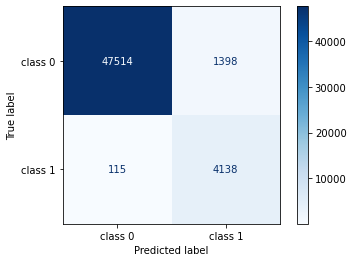

In [35]:
#performance results
print(classification_report(y_test, y_pred1, target_names=target_names))
plot_confusion_matrix(model1, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

  ## Over-sampling with SMOTE

In [36]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit on the trainning dataset
X_smote , y_smote = smote.fit_resample(df_X_train_stand, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

Original dataset shape: Counter({0: 195659, 1: 16999})
Resample dataset shape: Counter({0: 195659, 1: 195659})


 ### b) Logistic Regression with Synthetic minority over-sampling technique (LR+SMOTE)

In [37]:
#Run grid search only on training set using cross-validation
start=perf_counter()
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model2=RandomizedSearchCV(LogisticRegression(solver='saga' ,max_iter=1000),parameters,cv=5, n_jobs=-1, verbose=3)
model2.fit(X_smote,y_smote)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.30 hrs.


In [38]:
print("tuned hpyerparameters :(best parameters) ",model2.best_params_)
print("accuracy :",model2.best_score_)
print('Best Model:',model2.best_estimator_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': 1.0}
accuracy : 0.9819890710356391
Best Model: LogisticRegression(max_iter=1000, penalty='l1', solver='saga')


In [39]:
y_pred2=model2.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      0.97      0.98     48912
     class 1       0.75      0.97      0.85      4253

    accuracy                           0.97     53165
   macro avg       0.88      0.97      0.92     53165
weighted avg       0.98      0.97      0.97     53165



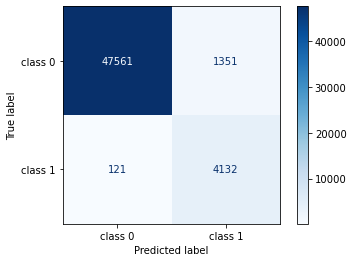

In [40]:
#performance results
print(classification_report(y_test, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Decision Tree (W-DT)

In [41]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'criterion':['gini','entropy'], 'max_depth' : np.arange(1, 20)}
model3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters, cv=5, n_jobs=-1, verbose=3)
# fit on the trainning dataset
model3.fit(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
Elapsed time: 0.01 hrs.


In [42]:
print("tuned hpyerparameters :(best parameters) ",model3.best_params_)
print("accuracy :",model3.best_score_)
print('Best Model:',model3.best_estimator_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 15}
accuracy : 0.999642619151139
Best Model: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15)


In [43]:
y_pred3 = model3.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     48912
     class 1       1.00      0.99      1.00      4253

    accuracy                           1.00     53165
   macro avg       1.00      1.00      1.00     53165
weighted avg       1.00      1.00      1.00     53165



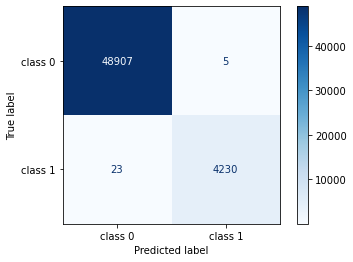

In [44]:
#performance results
print(classification_report(y_test, y_pred3, target_names=target_names))
plot_confusion_matrix(model3, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

## Undersampling using OSS
OneSidedSelection (OSS) is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. 

In [45]:
# Import library
from imblearn.under_sampling import OneSidedSelection

In [46]:
# define the undersampling method
oss = OneSidedSelection(random_state=0, n_jobs=-1)
start=perf_counter()
# fit on the trainning dataset
X_oss, y_oss = oss.fit_resample(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)
# summarize the new class distribution
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_oss))

Elapsed time: 0.13 hrs.
Original dataset shape: Counter({0: 195659, 1: 16999})
Resample dataset shape: Counter({0: 190532, 1: 16999})


### d) Weighted Support Vector Machine with One Sided Selection (SVM+OSS)

In [47]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'C':np.arange(1, 20)}
model4 = GridSearchCV(SVC(class_weight='balanced', kernel='rbf'), parameters, cv=5,n_jobs=-1, verbose=3)
model4.fit(X_oss, y_oss)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Elapsed time: 0.34 hrs.


In [48]:
print("tuned hpyerparameters :(best parameters) ",model4.best_params_)
print("accuracy :",model4.best_score_)
print('Best Model:',model4.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 19}
accuracy : 0.9974124350703774
Best Model: SVC(C=19, class_weight='balanced')


In [49]:
y_pred4 = model4.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     48912
     class 1       0.97      0.99      0.98      4253

    accuracy                           1.00     53165
   macro avg       0.99      1.00      0.99     53165
weighted avg       1.00      1.00      1.00     53165



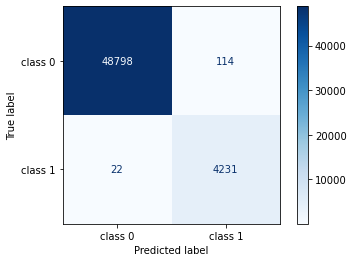

In [50]:
#performance results
print(classification_report(y_test, y_pred4, target_names=target_names))
plot_confusion_matrix(model4, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### e)  XG Boost, Extreme Gradient Boosting (XGB)

In [51]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'max_depth': np.arange (2, 10),'n_estimators': np.arange(60, 220, 40), 
              'learning_rate': [0.1, 0.01, 0.05],'gamma' : [0.1, 1, 1.5], 
              'subsample' : [0.8, 0.9, 1.0],
             'colsample_bytree' : [0.3, 0.5, 1.0]}
model5 = RandomizedSearchCV(XGBClassifier(eval_metric='logloss',use_label_encoder =False),
                            parameters, cv=5, n_jobs=-1,scoring='roc_auc',verbose=3)
model5.fit(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.03 hrs.


In [52]:
print("tuned hpyerparameters :(best parameters) ",model5.best_params_)
print("roc_auc :",model5.best_score_)
print('Best Model:',model5.best_estimator_)

tuned hpyerparameters :(best parameters)  {'subsample': 1.0, 'n_estimators': 140, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 1.5, 'colsample_bytree': 0.5}
roc_auc : 0.9999972708807124
Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=1.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=32,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [53]:
y_pred5 = model5.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     48912
     class 1       1.00      1.00      1.00      4253

    accuracy                           1.00     53165
   macro avg       1.00      1.00      1.00     53165
weighted avg       1.00      1.00      1.00     53165



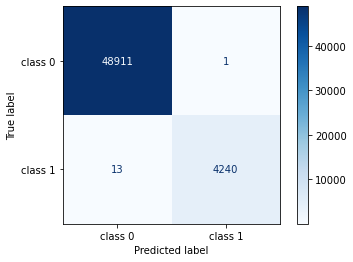

In [54]:
#performance results
print(classification_report(y_test, y_pred5, target_names=target_names))
plot_confusion_matrix(model5, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

In [55]:
#save notebook session
import dill
dill.dump_session('session_esc-02.db')
#to restore a notebook session
#dill.load_session('session_esc-02.db')